In [16]:
# Getting dependencies
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
import time
import threading
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [17]:
# Pulling top 50 data from csv file in Data
df_top = pd.read_csv('Data/streamer_game_data.csv')
df_top.head(50)

,Channel,Average viewers,Followers,Game ID,Game Name
0,Tfue,29602,8938903,512710,Call Of Duty: Modern Warfare
1,shroud,29612,7744066,516575,VALORANT
2,Myth,9396,6726893,509658,Just Chatting
3,pokimane,16026,5367605,509658,Just Chatting
4,summit1g,25610,5310163,516575,VALORANT
5,TimTheTatman,25664,5265659,509658,Just Chatting
6,dakotaz,7112,4520305,510218,Among Us
7,Riot Games (riotgames),20960,4487489,21779,League of Legends
8,DrDisrespect,23794,4450718,512710,Call Of Duty: Modern Warfare
9,DrLupo,8311,4115083,18122,World of Warcraft


In [18]:
df_top_games = pd.read_csv('Data/top_game_ranking.csv')
df_top_games = df_top_games.rename(columns={"0":"Game Ranking"})

In [19]:
df_top_games.dtypes

Game Ranking     int64
Game Name       object
dtype: object

In [20]:
df_test = df_top.merge(df_top_games, on = "Game Name")
df_test

,Channel,Average viewers,Followers,Game ID,Game Name,Game Ranking
0,Tfue,29602,8938903,512710,Call Of Duty: Modern Warfare,3
1,DrDisrespect,23794,4450718,512710,Call Of Duty: Modern Warfare,3
2,NICKMERCS,24181,4074287,512710,Call Of Duty: Modern Warfare,3
3,Symfuhny,7327,2355063,512710,Call Of Duty: Modern Warfare,3
4,cloakzy,6743,2138294,512710,Call Of Duty: Modern Warfare,3
5,CouRageJD,8717,2115596,512710,Call Of Duty: Modern Warfare,3
6,Aydan,3507,1701314,512710,Call Of Duty: Modern Warfare,3
7,shroud,29612,7744066,516575,VALORANT,8
8,summit1g,25610,5310163,516575,VALORANT,8
9,Myth,9396,6726893,509658,Just Chatting,2


In [21]:
df_graph = df_test.groupby('Game Name').sum()
df_graph

,Average viewers,Followers,Game ID,Game Ranking
Game Name,,,,
ASMR,2560,1707804,509659,42
Among Us,41959,11607148,2551090,5
Call Of Duty: Modern Warfare,103871,25774175,3588970,21
Counter-Strike: Global Offensive,34814,10035238,129596,60
FIFA 21,17779,2411995,518204,14
Fortnite,90780,15978400,199284,36
Just Chatting,77106,23027048,2548290,10
League of Legends,60852,14070534,108895,20
Minecraft,27716,3246298,27471,5


In [22]:
df_graph_sorted = df_graph.sort_values(by=['Average viewers'], ascending = False)
df_graph_sorted = df_graph_sorted.reset_index()
df_graph_sorted

,Game Name,Average viewers,Followers,Game ID,Game Ranking
0,Call Of Duty: Modern Warfare,103871,25774175,3588970,21
1,Fortnite,90780,15978400,199284,36
2,Just Chatting,77106,23027048,2548290,10
3,League of Legends,60852,14070534,108895,20
4,VALORANT,55222,13054229,1033150,16
5,Among Us,41959,11607148,2551090,5
6,Counter-Strike: Global Offensive,34814,10035238,129596,60
7,Overwatch,33132,1796619,488552,19
8,Minecraft,27716,3246298,27471,5
9,Old School RuneScape,18440,3886449,919862,62


In [23]:
df_graph.sort_values(by=['Followers'], ascending = False)

,Average viewers,Followers,Game ID,Game Ranking
Game Name,,,,
Call Of Duty: Modern Warfare,103871,25774175,3588970,21
Just Chatting,77106,23027048,2548290,10
Fortnite,90780,15978400,199284,36
League of Legends,60852,14070534,108895,20
VALORANT,55222,13054229,1033150,16
Among Us,41959,11607148,2551090,5
Counter-Strike: Global Offensive,34814,10035238,129596,60
World of Warcraft,8311,4115083,18122,11
Old School RuneScape,18440,3886449,919862,62


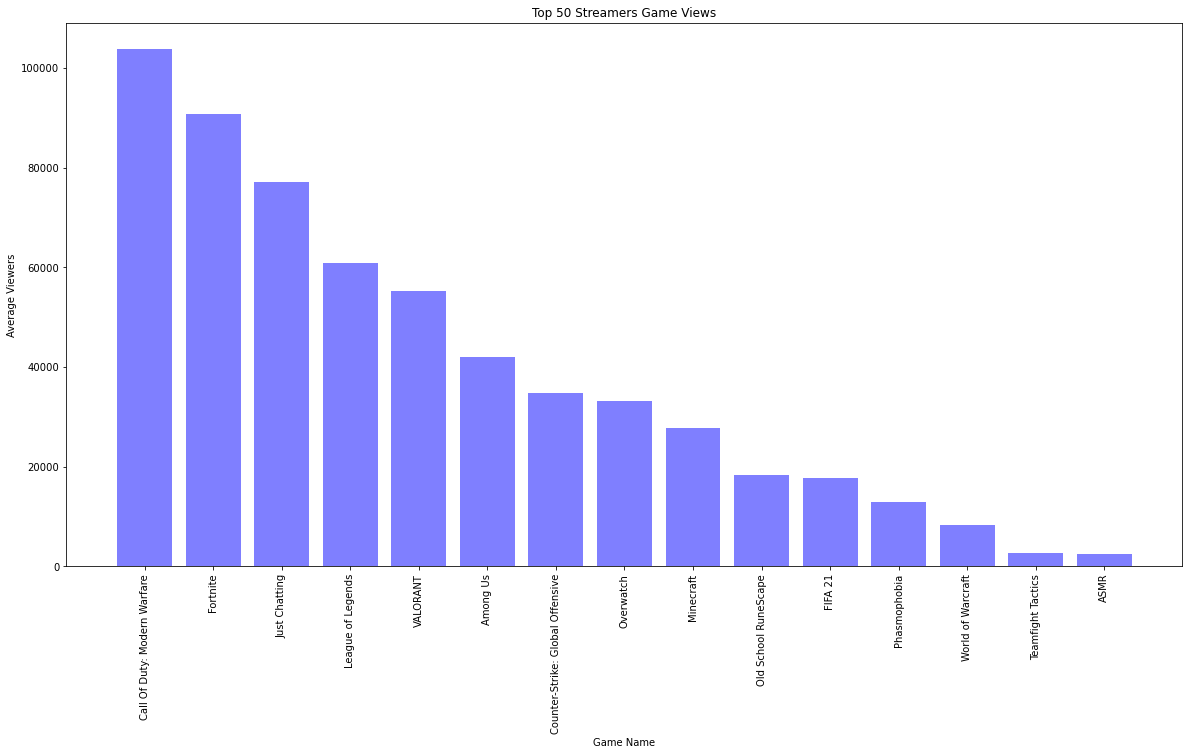

In [24]:
x_axis = df_graph_sorted['Game Name']
y_axis = df_graph_sorted['Average viewers']

#Create the bar chat
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation = 'vertical')
plt.title("Top 50 Streamers Game Views")
plt.xlabel("Game Name")
plt.ylabel("Average Viewers");

In [25]:
df_graph_count = df_test.groupby('Game Name').count()
df_graph_count = df_graph_count.sort_values(by = 'Channel', ascending = False)
df_graph_count

,Channel,Average viewers,Followers,Game ID,Game Ranking
Game Name,,,,,
Call Of Duty: Modern Warfare,7,7,7,7,7
Fortnite,6,6,6,6,6
Among Us,5,5,5,5,5
Just Chatting,5,5,5,5,5
League of Legends,5,5,5,5,5
Counter-Strike: Global Offensive,4,4,4,4,4
Old School RuneScape,2,2,2,2,2
VALORANT,2,2,2,2,2
ASMR,1,1,1,1,1


In [26]:
df_test

,Channel,Average viewers,Followers,Game ID,Game Name,Game Ranking
0,Tfue,29602,8938903,512710,Call Of Duty: Modern Warfare,3
1,DrDisrespect,23794,4450718,512710,Call Of Duty: Modern Warfare,3
2,NICKMERCS,24181,4074287,512710,Call Of Duty: Modern Warfare,3
3,Symfuhny,7327,2355063,512710,Call Of Duty: Modern Warfare,3
4,cloakzy,6743,2138294,512710,Call Of Duty: Modern Warfare,3
5,CouRageJD,8717,2115596,512710,Call Of Duty: Modern Warfare,3
6,Aydan,3507,1701314,512710,Call Of Duty: Modern Warfare,3
7,shroud,29612,7744066,516575,VALORANT,8
8,summit1g,25610,5310163,516575,VALORANT,8
9,Myth,9396,6726893,509658,Just Chatting,2


In [27]:
df_top

,Channel,Average viewers,Followers,Game ID,Game Name
0,Tfue,29602,8938903,512710,Call Of Duty: Modern Warfare
1,shroud,29612,7744066,516575,VALORANT
2,Myth,9396,6726893,509658,Just Chatting
3,pokimane,16026,5367605,509658,Just Chatting
4,summit1g,25610,5310163,516575,VALORANT
5,TimTheTatman,25664,5265659,509658,Just Chatting
6,dakotaz,7112,4520305,510218,Among Us
7,Riot Games (riotgames),20960,4487489,21779,League of Legends
8,DrDisrespect,23794,4450718,512710,Call Of Duty: Modern Warfare
9,DrLupo,8311,4115083,18122,World of Warcraft


In [28]:
df_graph.sort_values(by=['Followers'], ascending = False)
df_graph

,Average viewers,Followers,Game ID,Game Ranking
Game Name,,,,
ASMR,2560,1707804,509659,42
Among Us,41959,11607148,2551090,5
Call Of Duty: Modern Warfare,103871,25774175,3588970,21
Counter-Strike: Global Offensive,34814,10035238,129596,60
FIFA 21,17779,2411995,518204,14
Fortnite,90780,15978400,199284,36
Just Chatting,77106,23027048,2548290,10
League of Legends,60852,14070534,108895,20
Minecraft,27716,3246298,27471,5
